In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
articles = pd.read_json('my_guardian_articles.json')
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2000 non-null   object
 1   type                2000 non-null   object
 2   sectionId           2000 non-null   object
 3   sectionName         2000 non-null   object
 4   webPublicationDate  2000 non-null   object
 5   webTitle            2000 non-null   object
 6   webUrl              2000 non-null   object
 7   apiUrl              2000 non-null   object
 8   fields              2000 non-null   object
 9   tags                2000 non-null   object
 10  isHosted            2000 non-null   bool  
 11  pillarId            1980 non-null   object
 12  pillarName          1980 non-null   object
dtypes: bool(1), object(12)
memory usage: 205.1+ KB


## Prepping the Data

In [169]:
articles.head()


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,tags,isHosted,pillarId,pillarName
0,technology/2023/oct/31/educators-teachers-ai-l...,article,technology,Technology,2023-10-31T10:00:39Z,‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Johana Bhuiyan', 'body': '<p>In <a...","[{'id': 'technology/technology', 'type': 'keyw...",False,pillar/news,News
1,technology/ng-interactive/2023/oct/25/a-day-in...,interactive,technology,Technology,2023-10-25T13:38:11Z,A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,https://content.guardianapis.com/technology/ng...,{'byline': 'Hannah Devlin Science Corresponden...,"[{'id': 'technology/artificialintelligenceai',...",False,pillar/news,News
2,technology/2023/oct/24/alphabet-q3-earnings-go...,article,technology,Technology,2023-10-24T22:07:37Z,Google Cloud revenue misses expectations despi...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Kari Paul', 'body': '<p>Google is ...","[{'id': 'technology/alphabet', 'type': 'keywor...",False,pillar/news,News
3,stage/2023/sep/19/anthropology-review-hampstea...,article,stage,Stage,2023-09-19T12:02:55Z,Anthropology review – clever AI missing-person...,https://www.theguardian.com/stage/2023/sep/19/...,https://content.guardianapis.com/stage/2023/se...,"{'byline': 'Mark Lawson', 'body': '<p>While sc...","[{'id': 'stage/stage', 'type': 'keyword', 'sec...",False,pillar/arts,Arts
4,film/2023/aug/20/tim-review-clunky-ai-paranoia...,article,film,Film,2023-08-20T10:30:44Z,TIM review – clunky AI paranoia thriller,https://www.theguardian.com/film/2023/aug/20/t...,https://content.guardianapis.com/film/2023/aug...,"{'byline': 'Wendy Ide', 'body': '<p>This styli...","[{'id': 'film/thriller', 'type': 'keyword', 's...",False,pillar/arts,Arts


In [170]:
articles_field_data = pd.json_normalize(articles['fields'])

In [171]:
articles = articles.merge(articles_field_data, left_index=True, right_index=True)


In [172]:
articles['wordcount'] = pd.to_numeric(articles['wordcount'])

In [173]:
articles['webPublicationDate'] = pd.to_datetime(articles['webPublicationDate'])

## Data Counts over time

In [174]:
articles['webPublicationDate'].describe()

/var/folders/l9/kdgf4rl93l1901dbcw6l5pv80000gn/T/ipykernel_66936/4090036014.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  articles['webPublicationDate'].describe()


count                          2000
unique                         1974
top       2023-03-26 09:00:14+00:00
freq                              3
first     2020-08-21 14:20:31+00:00
last      2023-11-08 15:05:42+00:00
Name: webPublicationDate, dtype: object

In [190]:
time_grouper = pd.Grouper(key='webPublicationDate', freq='M')
count_over_time = articles.groupby(time_grouper).count().reset_index()[['webPublicationDate','id']]
count_over_time.head()

,webPublicationDate,id
0,2022-01-31 00:00:00+00:00,4
1,2022-02-28 00:00:00+00:00,11
2,2022-03-31 00:00:00+00:00,9
3,2022-04-30 00:00:00+00:00,16
4,2022-05-31 00:00:00+00:00,17


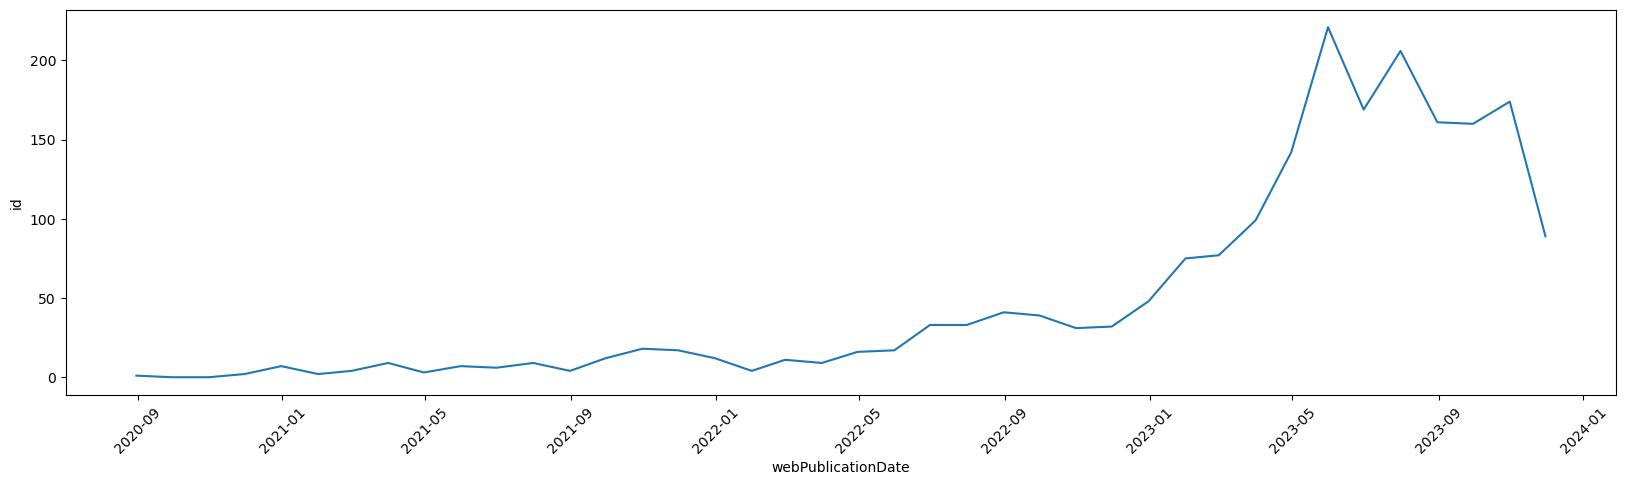

In [178]:
plt.figure(figsize=(20,5))
plot = sns.lineplot(data=count_over_time, x='webPublicationDate', y='id')

plot.tick_params(axis='x', labelrotation=45)

## Optional: Filtering by a Date Range

In [179]:
date_filter = articles['webPublicationDate'] >= 'January 2022'
articles = articles[date_filter]

In [184]:
articles['webPublicationDate'].describe()

/var/folders/l9/kdgf4rl93l1901dbcw6l5pv80000gn/T/ipykernel_66936/4090036014.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  articles['webPublicationDate'].describe()


count                          1887
unique                         1863
top       2023-03-26 09:00:14+00:00
freq                              3
first     2022-01-09 09:00:17+00:00
last      2023-11-08 15:05:42+00:00
Name: webPublicationDate, dtype: object

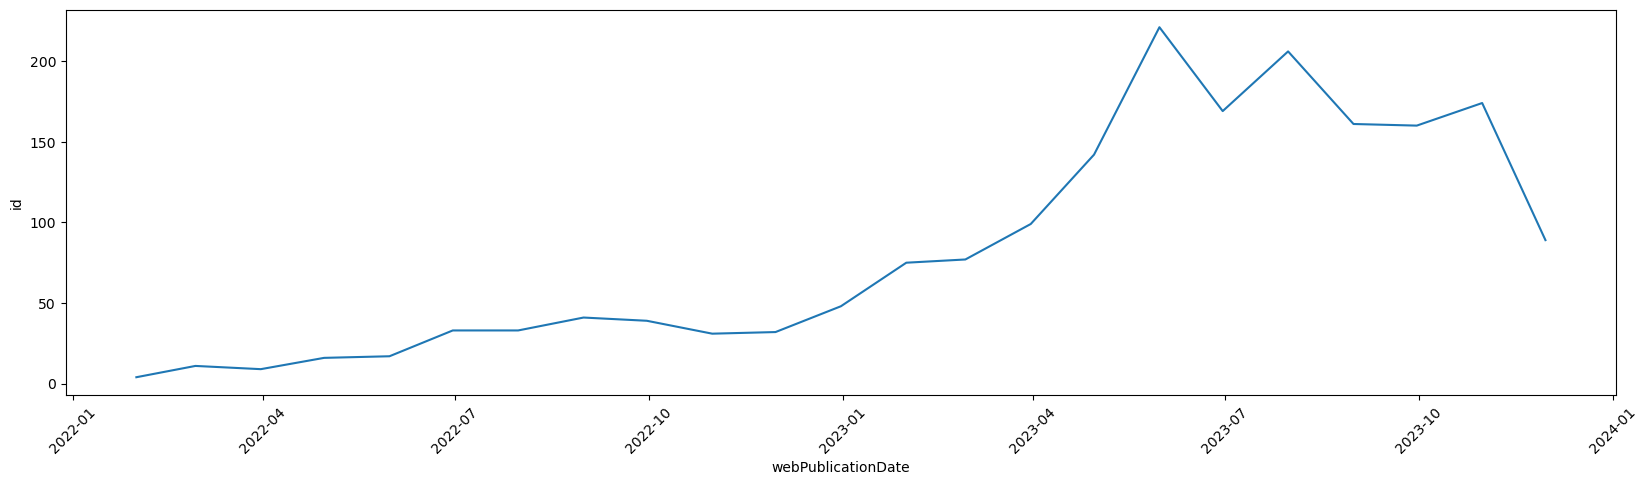

In [189]:
time_grouper = pd.Grouper(key='webPublicationDate', freq='M')
count_over_time = articles.groupby(time_grouper).count().reset_index()
plt.figure(figsize=(20,5))

plot = sns.lineplot(data=count_over_time, x='webPublicationDate', y='id')
plot.tick_params(axis='x', labelrotation=45)

## Appropriate Pillars?

In [195]:
pillar_counts = articles['pillarName'].value_counts()
pillar_counts


News         1072
Arts          479
Opinion       201
Lifestyle      73
Sport          42
Name: pillarName, dtype: int64

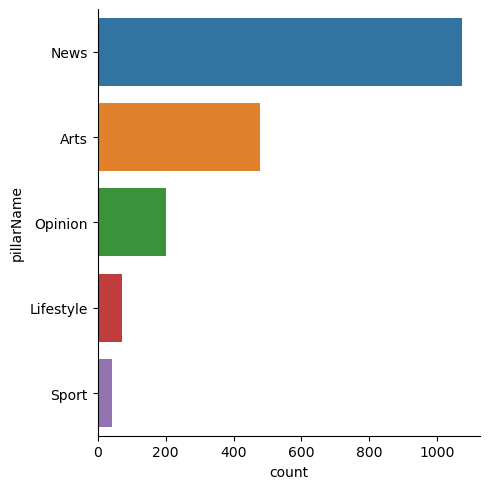

In [196]:
sns.catplot(data=articles, y='pillarName', kind='count', order=pillar_counts.index)

## Optional: Filtering by Pillar

In [197]:
chosen_pillars = ['News', 'Opinion']
pillar_filter = articles['pillarName'].isin(chosen_pillars)
articles = articles[pillar_filter]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1997
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  1273 non-null   object             
 1   type                1273 non-null   object             
 2   sectionId           1273 non-null   object             
 3   sectionName         1273 non-null   object             
 4   webPublicationDate  1273 non-null   datetime64[ns, UTC]
 5   webTitle            1273 non-null   object             
 6   webUrl              1273 non-null   object             
 7   apiUrl              1273 non-null   object             
 8   fields              1273 non-null   object             
 9   tags                1273 non-null   object             
 10  isHosted            1273 non-null   bool               
 11  pillarId            1273 non-null   object             
 12  pillarName          1273 non-null 

In [198]:
new_pillar_counts = articles['pillarName'].value_counts()
new_pillar_counts

News       1072
Opinion     201
Name: pillarName, dtype: int64

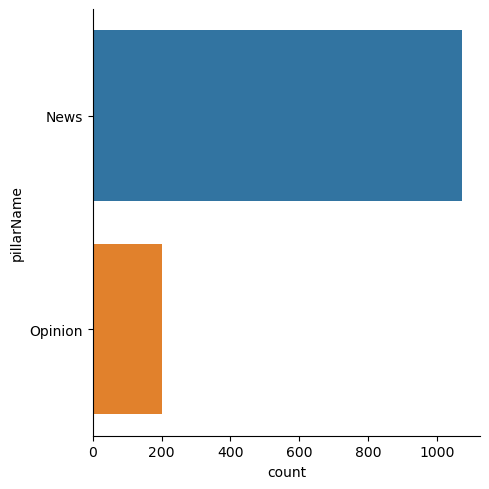

In [199]:
sns.catplot(data=articles, y='pillarName', kind='count', order=new_pillar_counts.index)

## Sections

In [146]:
section_counts = articles.groupby('sectionName').count().reset_index()[['sectionName','id']].sort_values('id', ascending=False)
section_counts

,sectionName,id
14,Technology,381
0,Australia news,54
1,Business,52
11,Politics,36
16,US news,34
17,World news,27
10,News,26
12,Science,22
13,Society,20
3,Environment,16


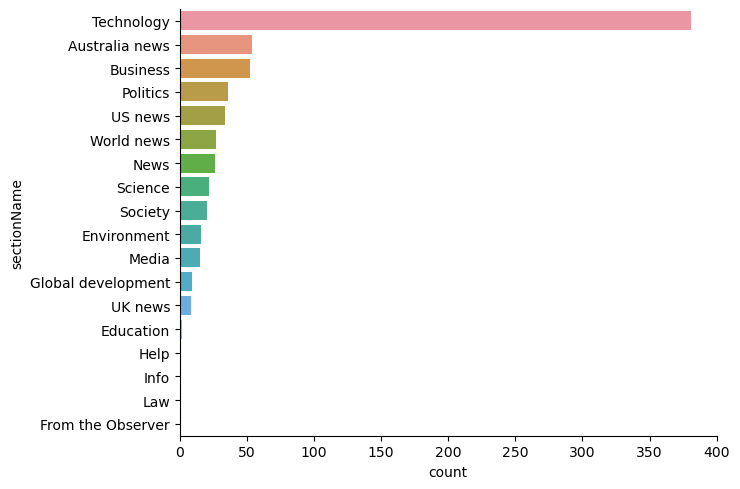

In [147]:

sns.catplot(data=articles, y='sectionName', kind='count', aspect=1.5, order=section_counts['sectionName'])


In [148]:
top_sections = section_counts['sectionName'].iloc[:10]
top_sections

14        Technology
0     Australia news
1           Business
11          Politics
16           US news
17        World news
10              News
12           Science
13           Society
3        Environment
Name: sectionName, dtype: object

In [149]:
articles.groupby('sectionName').agg(wc_sum=('wordcount','sum'),
                                    wc_mean=('wordcount','mean'),
                                    n_articles=('id', 'nunique')).sort_values('wc_sum', ascending=False)

,wc_sum,wc_mean,n_articles
sectionName,,,
Technology,395173,1037.199475,381
Business,82269,1582.096154,52
Australia news,60414,1118.777778,54
US news,43858,1289.941176,33
Politics,40095,1113.750000,36
Science,39944,1815.636364,22
News,34498,1326.846154,26
World news,28258,1046.592593,27
Environment,22706,1419.125000,16


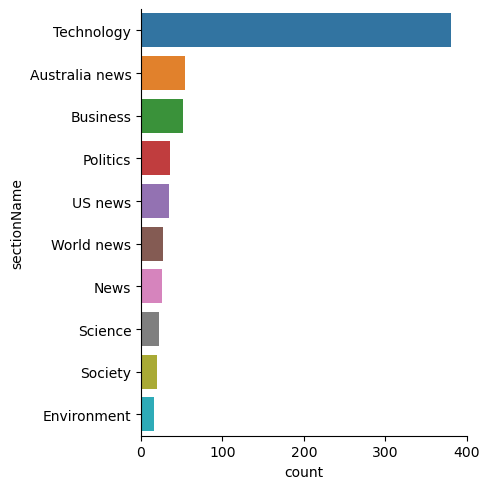

In [132]:
import seaborn as sns
section_filter = articles['sectionName'].isin(top_sections)

top_section_articles = articles[section_filter]

sns.catplot(data=top_section_articles, y='sectionName', kind='count', order=top_sections)

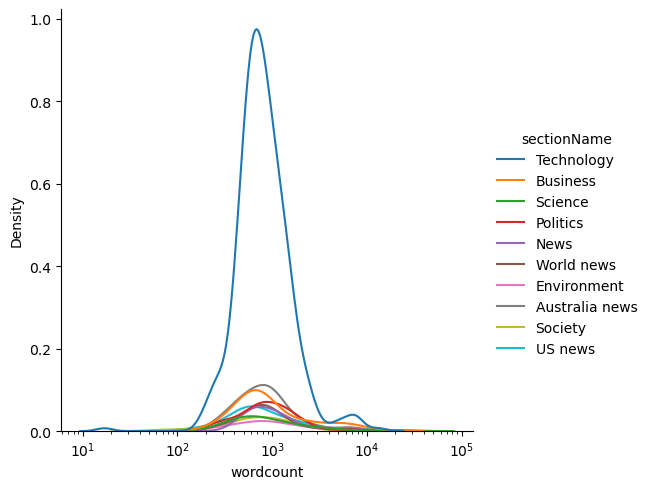

In [70]:
sns.displot(data=top_section_articles, x='wordcount', kind='kde', hue='sectionName',log_scale=True)

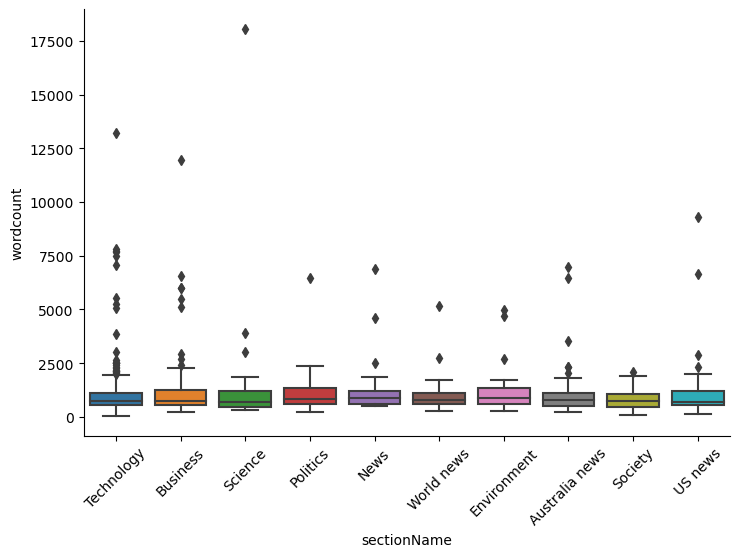

In [68]:
plot = sns.catplot(data=top_section_articles, y='wordcount', x='sectionName', aspect=1.5, kind='box')
plot.set_xticklabels(rotation=45)

In [71]:
top_section_articles = articles[section_filter]
time_grouper = pd.Grouper(key='webPublicationDate', freq='M')

date_counts = top_section_articles.groupby([time_grouper,'sectionName']).count().reset_index()
date_counts



,webPublicationDate,sectionName,id,type,sectionId,webTitle,webUrl,apiUrl,fields,tags,isHosted,pillarId,pillarName,byline,body,wordcount
0,2021-12-31 00:00:00+00:00,Business,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2022-02-28 00:00:00+00:00,Environment,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2022-03-31 00:00:00+00:00,Science,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,2022-04-30 00:00:00+00:00,Society,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2022-04-30 00:00:00+00:00,Technology,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2023-11-30 00:00:00+00:00,Politics,6,6,6,6,6,6,6,6,6,6,6,5,6,6
113,2023-11-30 00:00:00+00:00,Science,1,1,1,1,1,1,1,1,1,1,1,1,1,1
114,2023-11-30 00:00:00+00:00,Society,1,1,1,1,1,1,1,1,1,1,1,1,1,1
115,2023-11-30 00:00:00+00:00,Technology,23,23,23,23,23,23,23,23,23,23,23,23,23,23


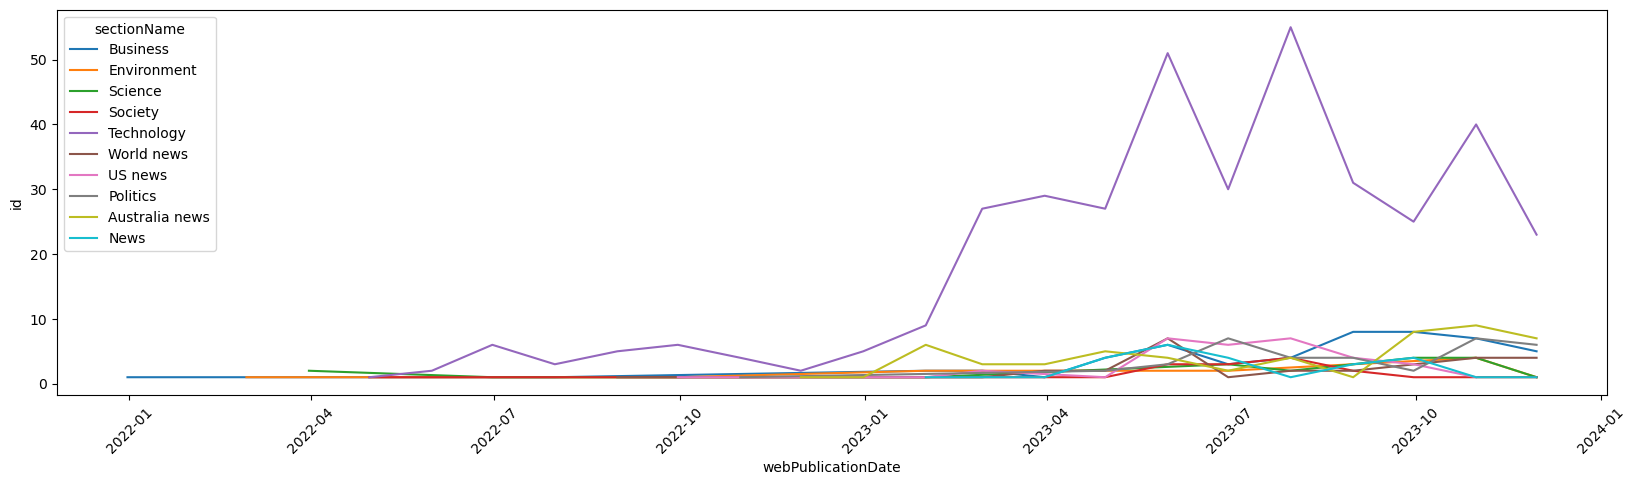

In [72]:

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plot = sns.lineplot(data=date_counts, x='webPublicationDate', y='id', hue='sectionName')

plot.tick_params(axis='x', labelrotation=45)

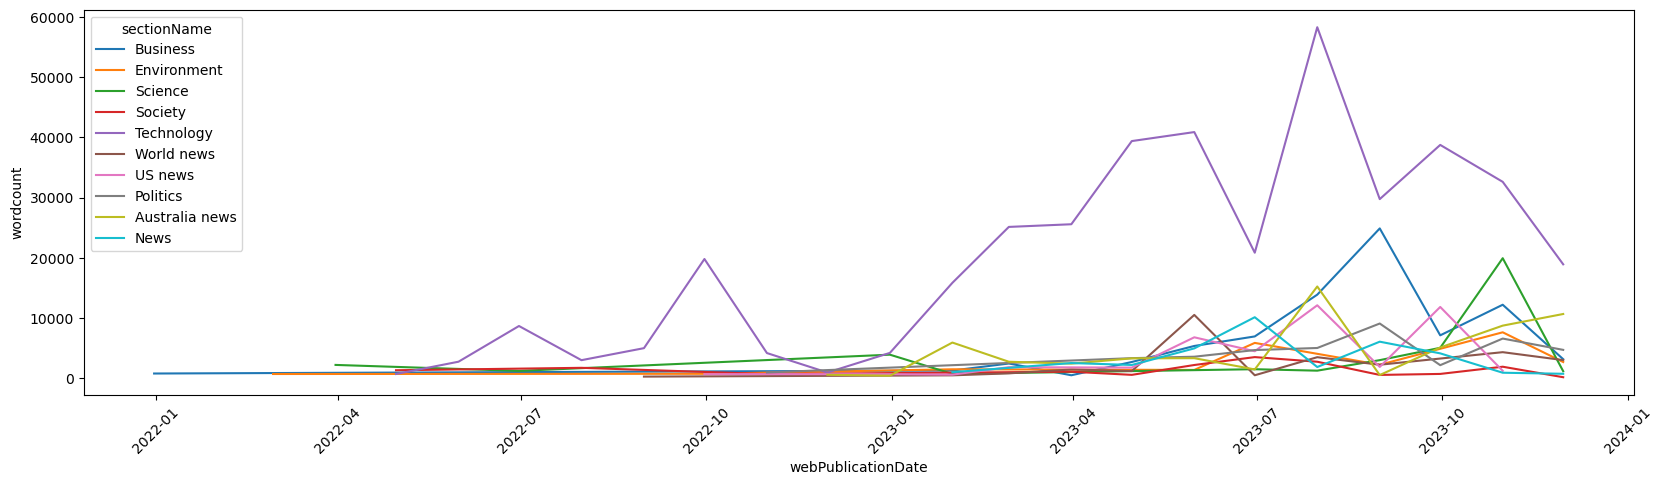

In [84]:
time_grouper = pd.Grouper(key='webPublicationDate', freq='m')
wc_per_month = top_section_articles.groupby([time_grouper,'sectionName']).sum().reset_index()
plt.figure(figsize=(20,5))
plot = sns.lineplot(data=wc_per_month, x='webPublicationDate', y='wordcount', hue='sectionName')

plot.tick_params(axis='x', labelrotation=45)

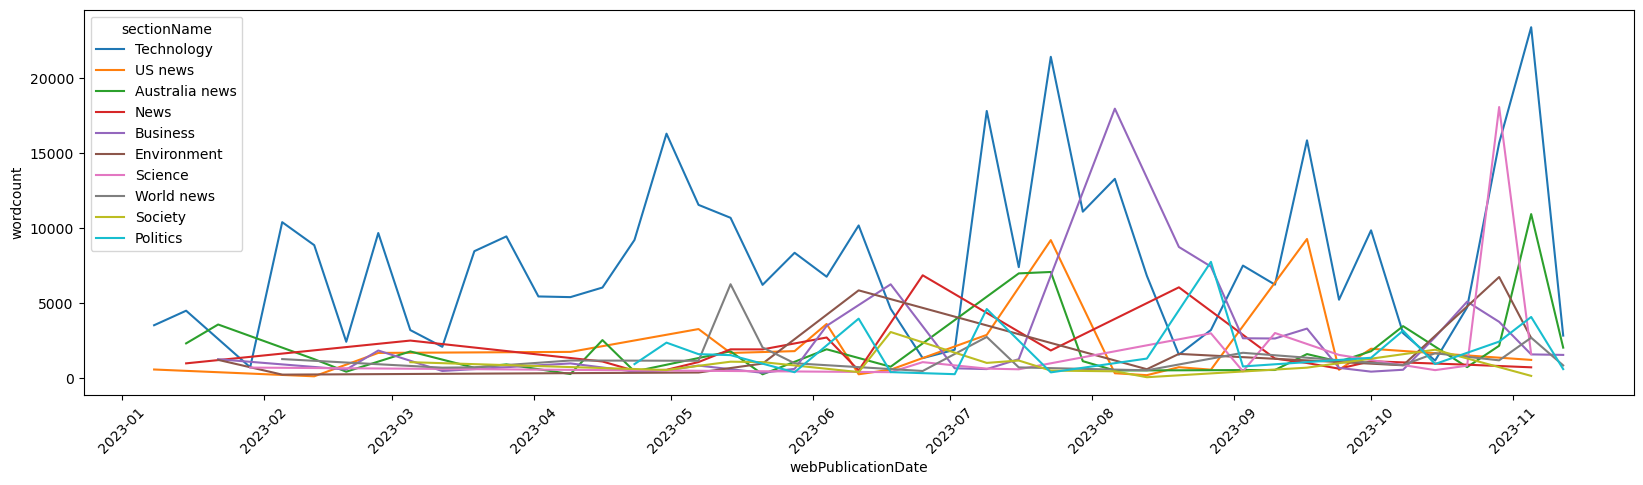

In [96]:
time_grouper = pd.Grouper(key='webPublicationDate', freq='W')  ### D, W or M

articles_2023 = top_section_articles[top_section_articles['webPublicationDate'] >= '2023']

wc_per_period = articles_2023.groupby([time_grouper,'sectionName']).sum()

plt.figure(figsize=(20,5))
plot = sns.lineplot(data=wc_per_period.reset_index(), x='webPublicationDate', y='wordcount', hue='sectionName')

plot.tick_params(axis='x', labelrotation=45)

In [98]:
wc_per_period.loc['2023-01']

isHosted  wordcount
webPublicationDate        sectionName                        
2023-01-08 00:00:00+00:00 Technology             0       3541
                          US news                0        591
2023-01-15 00:00:00+00:00 Australia news         0       2332
                          News                   0       1000
                          Technology             0       4509
2023-01-22 00:00:00+00:00 Australia news         0       3590
                          Business               0       1275
                          Environment            0       1233
2023-01-29 00:00:00+00:00 Science                0        719
                          Technology             0        741